Di sebuah alternate universe , setelah Tsubasa Ozora tidak berhasil membobol gawang Genzo Wakabayashi, Tsubasa memutuskan untuk menggantung sepatu miliknya dan fokus pada kejuaraan dunia FIFA 19. Agar terbentuk sebuah ultimate team , Tsubasa ingin menambahkan beberapa pemain baru pada tim miliknya.

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
import numpy as np

In [249]:
fifa = pd.read_csv("fifa.csv")
df = pd.DataFrame(fifa)

In [143]:
df.describe()

Age
count  18207.000000
mean      25.122206
std        4.669943
min       16.000000
25%       21.000000
50%       25.000000
75%       28.000000
max       45.000000

In [144]:
print("mode = ",df.mode().values[0])
print("skew = ",df.skew().values[0])
print("variance = ",df.var().values[0])
print("kurtosis = ",df.kurt(axis = 0).values[0])

mode =  ['J. Rodríguez' 21 'England']
skew =  0.3917641387687474
variance =  21.808364946571597
kurtosis =  -0.4595135539307731


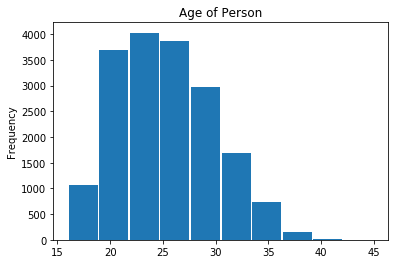

In [145]:
plotAge = df["Age"].plot(kind = "hist",rwidth=0.95, title = "Age of Person")

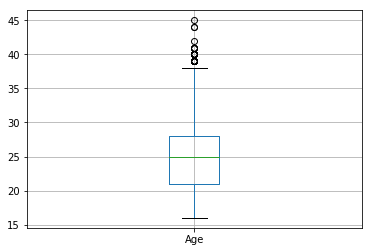

In [251]:
ageBoxPlot = df.boxplot()

NOTE. Digunakan fungsi ditribusi hypergeometry dikarenakan peluang di success di sini bersifat non-replacement. Ekspetasi akan didapat dari pencarian mean dari fungsi bersangkutan.

a. Jika terdapat 1000 pemain bola baru yang ditambahkan oleh Tsubasa, tentukan ekspektasi umur pemain bola yang:

i. Berumur kurang dari 22 tahun

In [222]:
[M, n, N] = [len(df), len(df.loc[df['Age']<22]), 1000]
rv = hypergeom(M, n, N)
x = np.arange(0, 1000+1)
pmf_player = rv.pmf(x)
pmf_player

array([2.05999227e-136, 7.85436126e-134, 1.49542745e-131, ...,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000])

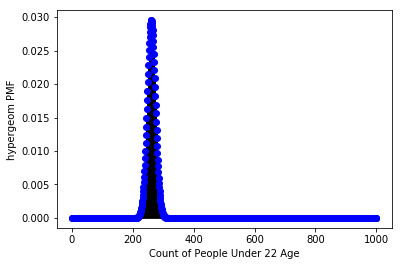

In [190]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, pmf_player, 'bo')
ax.vlines(x, 0, pmf_player, lw=1)
ax.set_xlabel('Count of People Under 22 Age')
ax.set_ylabel('hypergeom PMF')
plt.show()

In [232]:
print("Possibility of x=261 people under 22 age is",hypergeom.pmf(261, M, n, N,loc=0))
print("Expectation of the people under 22 age is around",round(hypergeom.mean(M, n, N, loc=0)))

Possibility of x=261 people under 22 age is 0.029537313812266985
Expectation of the people under 22 age is around 261.0



ii. Berumur lebih dari 40 tahun

In [257]:
#Jika terdapat 1000 pemain bola baru yang ditambahkan oleh Tsubasa,tentukan ekspektasi umur pemain bola yang kurang dari 44
[M, n, N] = [len(df), len(df.loc[df['Age']>40]), 1000]
rv = hypergeom(M, n, N)
x = np.arange(0, n+1)
pmf_people = rv.pmf(x)
pmf_people

array([6.01382765e-01, 3.14695324e-01, 7.31117742e-02, 9.89785196e-03,
       8.60495152e-04, 4.98199832e-05, 1.92090534e-06, 4.75620852e-08,
       6.86230830e-10, 4.39576260e-12])

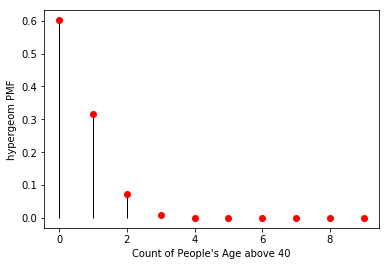

In [258]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_dogs, 'ro')
ax.vlines(x, 0, pmf_dogs, lw=1)
ax.set_xlabel('Count of People\'s Age above 40')
ax.set_ylabel('hypergeom PMF')
plt.show()

In [259]:
print("Possibility of x=0 num of people in the age of above 40 is",hypergeom.pmf(0, M, n, N,loc=0))
print("Expectation of the people above 44 age is around",round(hypergeom.mean(M, n, N, loc=0)))

Possibility of x=0 num of people in the age of above 40 is 0.6013827650350775
Expectation of the people above 44 age is around 0.0
